# Example 1 - Parallel Inclined Layers

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 972 m wide (W-E extent) and 1069 m high (N-S extent). 
<img src="../../data/Test1/task1.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example1/task1.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example1/interfaces1_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example1/orientations1.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example1/extent1.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example1/geolmap1.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example1/topo1.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example1/customsections1.shp')

# Inspect Data

In [3]:
interfaces.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


In [4]:
orientations.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


In [5]:
extent.head()

,id,geometry
0,None,"POLYGON ((-0.000 1069.000, 972.000 1069.000, 9..."


In [6]:
geological_map.head()

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


In [7]:
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


In [8]:
custom_section.head()

,id,section,geometry
0,None,Section1,"LINESTRING (1.372 383.979, 970.995 383.883)"


# Create GemPy Data Class

In [9]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

In [10]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

# Set Extent

In [11]:
geo_data.set_extent(gdf=extent, minz=300, maxz=800)
geo_data.extent

[-0.0, 972.0, -0.0, 1069.0, 300, 800]

# Set Resolution

In [12]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [13]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example1/style1.qml', geological_map)
cols

['#b35a2a', '#b35a2a', '#525252']

# Attribute Data to Data Class

In [14]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

In [15]:
geo_data.raw_i = interfaces
geo_data.raw_i

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


In [16]:
geo_data.raw_o = orientations
geo_data.raw_o

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)
5,None,Ton,30.50,180.00,POINT (843.907 167.023)
6,None,Ton,30.50,180.00,POINT (941.846 428.883)
7,None,Ton,30.50,180.00,POINT (22.142 299.553)


In [17]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

In [18]:
geo_data.geolmap = geological_map
geo_data.geolmap

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


In [19]:
geo_data.customsections = custom_section
geo_data.customsections

,id,section,geometry
0,None,Section1,"LINESTRING (1.372 383.979, 970.995 383.883)"


In [20]:
geo_data.contours = topo
geo_data.contours

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

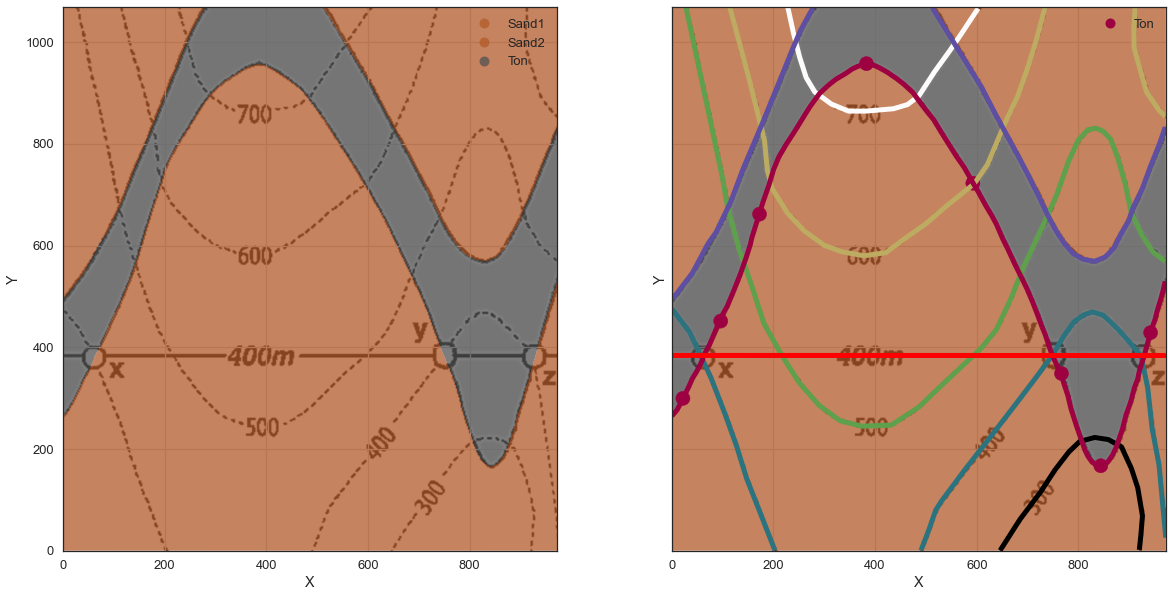

In [21]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

# Interpolate Topography

In [22]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
geo_data.raw_dem = dem
geo_data.raw_dem

array([[499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       ...,
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

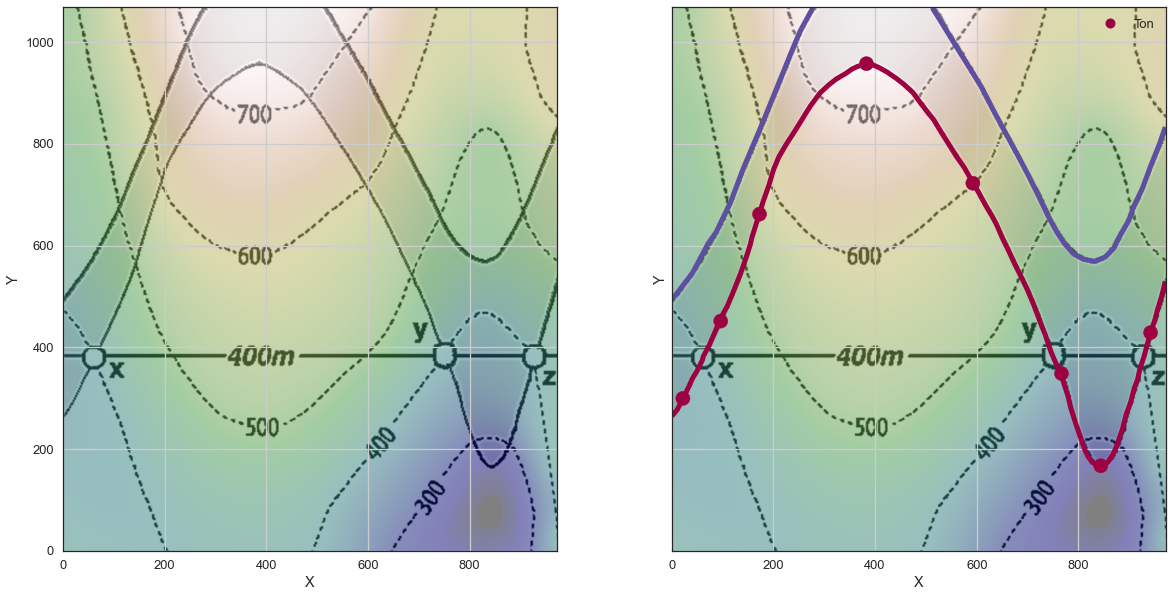

In [68]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Save Topography as Raster

In [24]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example1/topo.tif',np.flipud(dem), crs='EPSG:4326', extent=geo_data.extent)

In [25]:
topography = rasterio.open('../../../gemgis/data/examples/example1/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example1/topo.tif' mode='r'>

# Set Interfaces

In [26]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,dem, extent=geo_data.extent)
interfaces_coords.head()

,id,formation,geometry,points,X,Y,Z
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86,387.24
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73,387.15
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09,387.38
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31,387.52
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57,388.63


In [27]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces.head()

,index,X,Y,Z,formation
0,0,0.26,264.86,387.24,Sand1
1,0,10.59,276.73,387.15,Sand1
2,0,17.13,289.09,387.38,Sand1
3,0,19.15,293.31,387.52,Sand1
4,0,27.80,310.57,388.63,Sand1


# Set Orientations

In [28]:
orientations_coords = gg.vector.extract_coordinates(orientations,dem,extent=geo_data.extent)
orientations_coords.head()

,id,formation,dip,azimuth,geometry,X,Y,Z
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56,441.09
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88,556.87
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76,722.91
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70,601.57
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47,378.01


In [29]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,96.47,451.56,441.09,Ton,30.50,180.00,1
1,1,172.76,661.88,556.87,Ton,30.50,180.00,1
2,2,383.07,957.76,722.91,Ton,30.50,180.00,1
3,3,592.36,722.70,601.57,Ton,30.50,180.00,1
4,4,766.59,348.47,378.01,Ton,30.50,180.00,1


# Check Data Class

In [30]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0, 972, 0, 1069, 300, 800],
 'resolution': [50, 50, 50],
 'interfaces':      index      X       Y      Z formation
 0        0   0.26  264.86 387.24     Sand1
 1        0  10.59  276.73 387.15     Sand1
 2        0  17.13  289.09 387.38     Sand1
 3        0  19.15  293.31 387.52     Sand1
 4        0  27.80  310.57 388.63     Sand1
 ..     ...    ...     ...    ...       ...
 126      2 636.02  859.79 616.96       Ton
 127      2 608.85  912.40 647.22       Ton
 128      2 560.11  990.62 696.54       Ton
 129      2 526.38 1045.39 716.81       Ton
 130      2 512.24 1067.95 721.32       Ton
 
 [131 rows x 5 columns],
 'orientations':    index      X      Y      Z formation   dip  azimuth  polarity
 0      0  96.47 451.56 441.09       Ton 30.50   180.00         1
 1      1 172.76 661.88 556.87       Ton 30.50   180.00         1
 2      2 383.07 957.76 722.91       Ton 30.50   180.00         1
 3      3 592.36 722.70 601.57      

# Add Section Dict

In [31]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([1.372395262185787, 383.9794474025771],
  [970.9954955186289, 383.8831909730347],
  [100, 80])}

# Add Surface Colors

In [32]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example1/style1.qml', basement='Sand2')
geo_data.surface_colors

{'Sand1': '#b35a2a', 'Ton': '#525252', 'basement': '#b35a2a'}

# Add Stack

In [33]:
geo_data.stack = {"Strat_Series": ('Sand1', 'Ton')}
geo_data.stack

{'Strat_Series': ('Sand1', 'Ton')}

# Add DEM

In [34]:
geo_data.dem = '../../../gemgis/data/examples/example1/raster1.tif'
geo_data.dem

'../../../gemgis/data/examples/example1/raster1.tif'

# Visualize Data Set

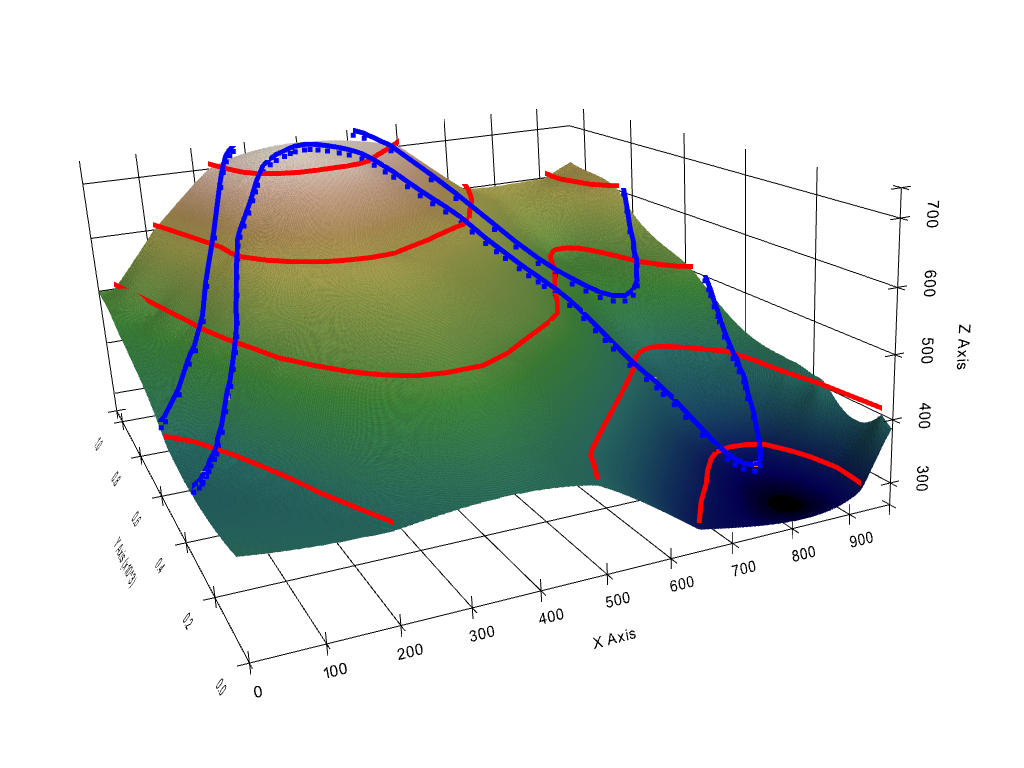

In [35]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(np.flipud(dem), p, cmap = 'gist_earth', extent = geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [36]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\gemgis\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [37]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-10-03 12:52

In [38]:
geo_model.solutions


Lithology ids 
  [] 

In [39]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-10-03 12:52

In [40]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sand1,Default series,1,#015482,1
1,Ton,Default series,2,#9f0052,2


In [41]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Sand1,Strat_Series,1,#015482,1
1,Ton,Strat_Series,2,#9f0052,2
2,basement,Strat_Series,3,#ffbe00,3


In [42]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [43]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example1/raster1.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [44]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[1.372395262185787, 383.9794474025771]","[970.9954955186289, 383.8831909730347]","[100, 80]",969.62


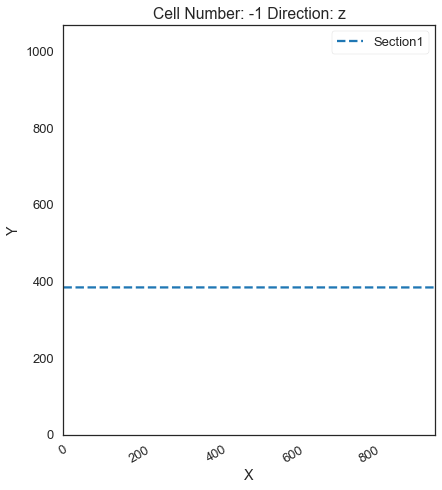

In [45]:
gp.plot.plot_section_traces(geo_model)

In [46]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1528.90
$C_o$           55655.83
drift equations      [3]


In [47]:
sol = gp.compute_model(geo_model, compute_mesh=True)

In [48]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
0,Sand1,Strat_Series,1,False,False,True,True,#b35a2a,"[[10.35467786103487, 10.69, 325.0], [29.160000...","[[2, 1, 0], [3, 0, 1], [4, 3, 1], [5, 3, 4], [...",0.51,1
1,Ton,Strat_Series,2,False,False,True,True,#525252,"[[9.72, 137.6784439086914, 305.0], [9.72, 138....","[[2, 1, 0], [1, 2, 3], [4, 1, 3], [5, 1, 4], [...",0.46,2
2,basement,Strat_Series,3,True,False,True,True,#b35a2a,NaN,NaN,NaN,3


The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

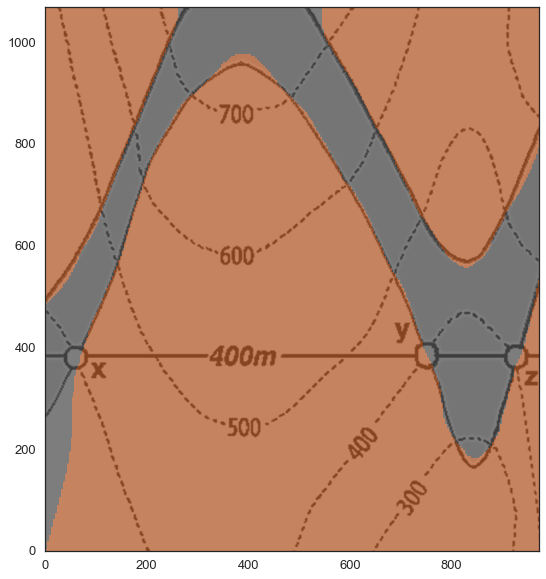

In [49]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252','#b35a2a' ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


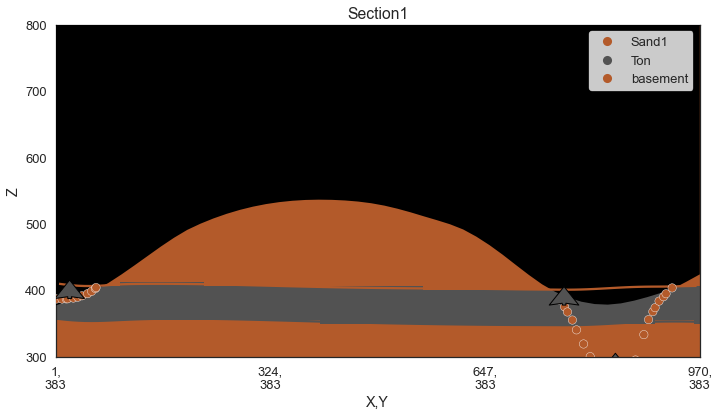

In [50]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


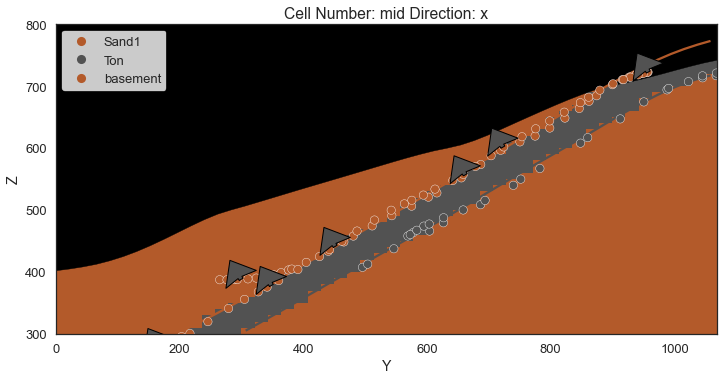

In [51]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


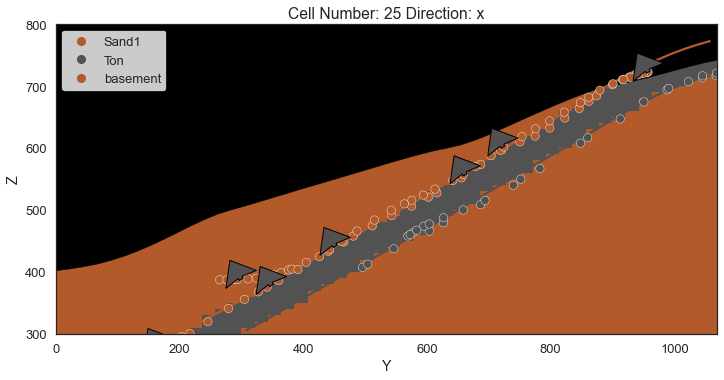

In [52]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


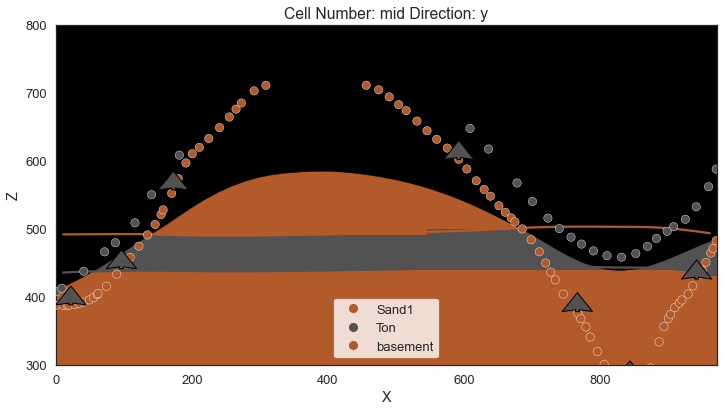

In [53]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

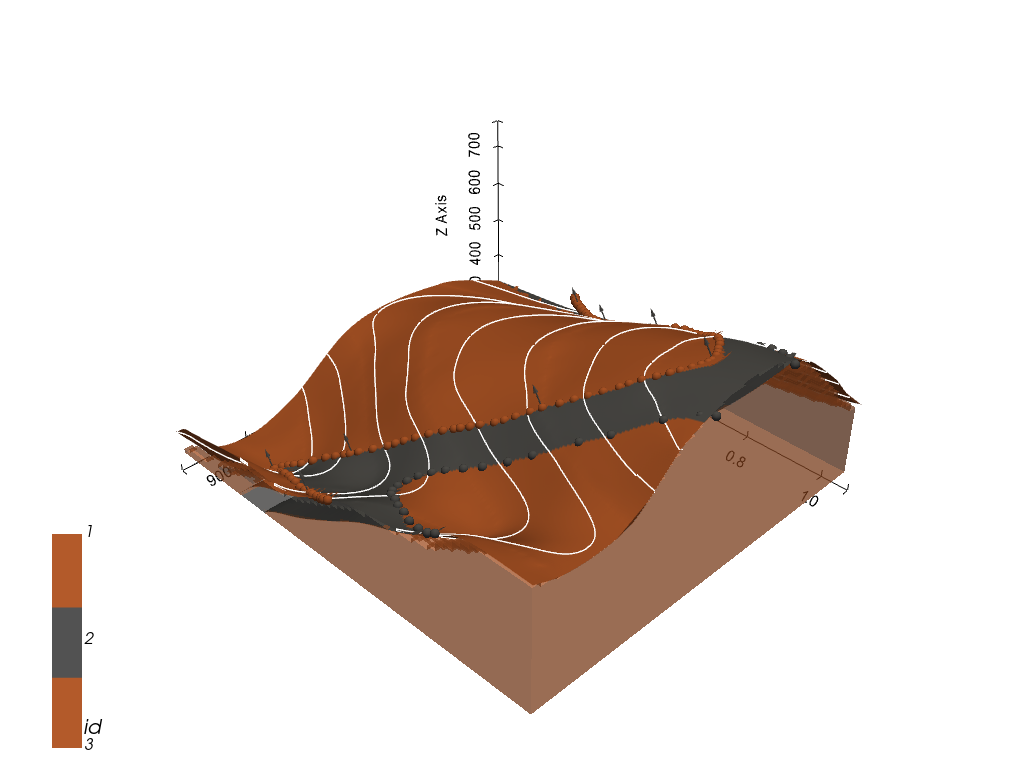

In [54]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [55]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((3.275 487.853, 5.832 490.003, 7.831 ..."
1,basement,"POLYGON ((826.200 557.320, 830.088 557.545, 83..."
2,Ton,"POLYGON ((2.406 5.831, 3.498 9.718, 4.586 13.6..."
3,Sand1,"POLYGON ((5.832 1.944, 9.720 1.944, 13.608 1.9..."


## Plot Polygons

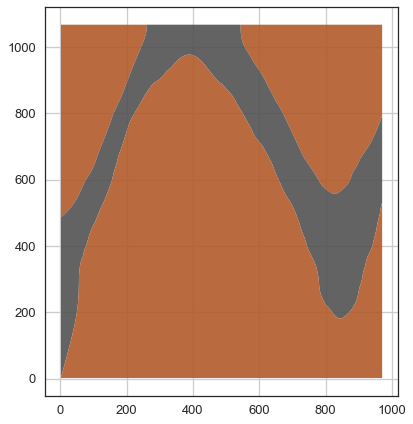

In [56]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9, aspect='equal')
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [57]:
gdf.to_file('../../../gemgis/data/examples/example1/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [58]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example1/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            500.20
$C_o$           5957.14
drift equations     [3]


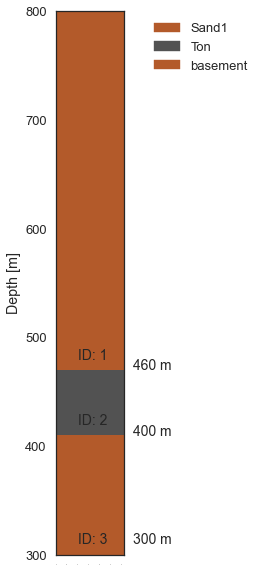

In [59]:
sol, well_model, depth_dict = gg.post.extract_borehole(geo_model, geo_data, [500,500])

In [60]:
depth_dict

{1: 460.0, 2: 400.0, 3: 300.0}

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Sand1

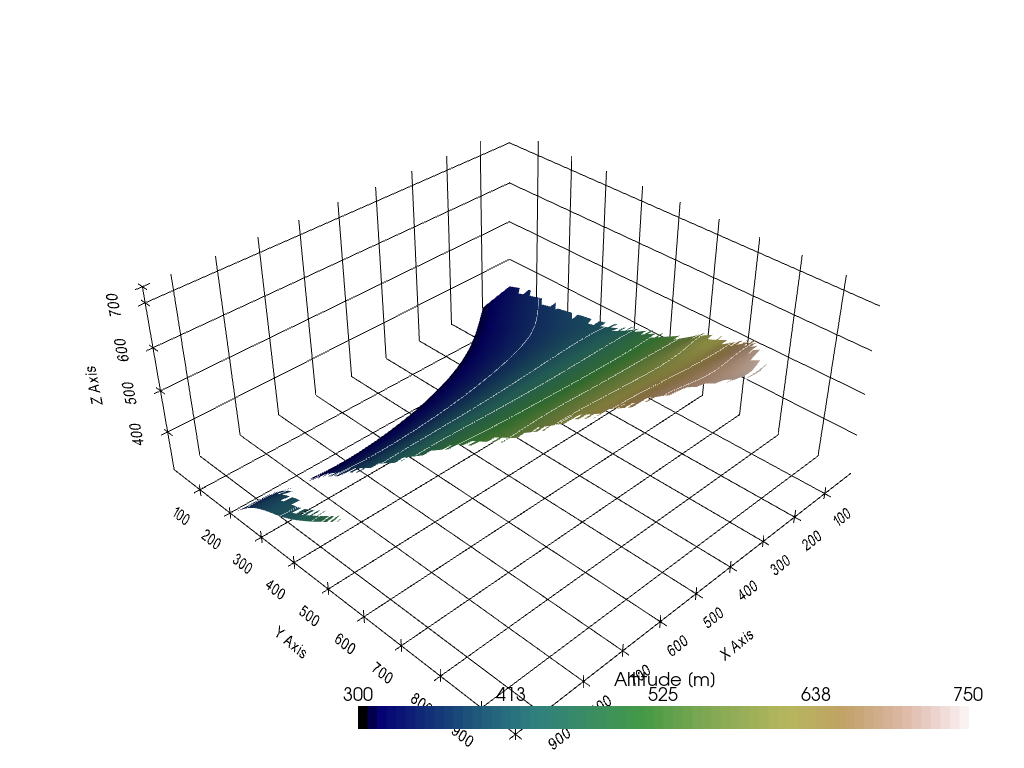

In [61]:
gg.visualization.plot_depth_map(geo_model, 'Sand1', clim=[300, 750], notebook=True)

## Depth Map Ton

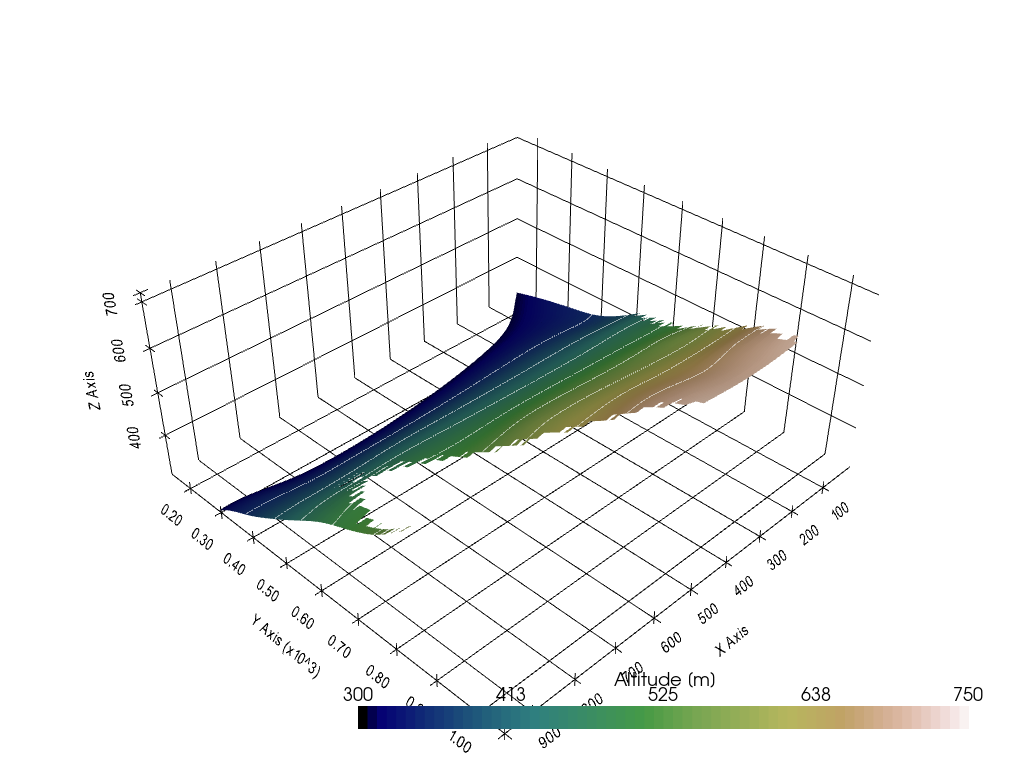

In [62]:
gg.visualization.plot_depth_map(geo_model, 'Ton', clim=[300, 750], notebook=True)

In [63]:
gg.post.save_model(geo_model, '../../data/Test1/Model/')
    

In [64]:
type(geo_model)

gempy.core.model.Project

In [65]:
geo_model.grid.regular_grid.extent

array([   0.,  972.,    0., 1069.,  300.,  800.])

In [66]:
geo_model.grid.values

array([[  9.72      ,  10.69      , 305.        ],
       [  9.72      ,  10.69      , 315.        ],
       [  9.72      ,  10.69      , 325.        ],
       ...,
       [970.99549552, 383.88319097, 787.34177215],
       [970.99549552, 383.88319097, 793.67088608],
       [970.99549552, 383.88319097, 800.        ]])

In [67]:
vars(geo_model)

{'meta': <gempy.core.data.MetaData at 0x2bafc103280>,
 '_grid': Grid Object. Values: 
 array([[  9.72      ,  10.69      , 305.        ],
        [  9.72      ,  10.69      , 315.        ],
        [  9.72      ,  10.69      , 325.        ],
        ...,
        [970.99549552, 383.88319097, 787.34177215],
        [970.99549552, 383.88319097, 793.67088608],
        [970.99549552, 383.88319097, 800.        ]]),
 '_faults':               order_series BottomRelation  isActive  isFault  isFinite
 Strat_Series             1        Erosion      True    False     False,
 '_stack':               order_series BottomRelation  isActive  isFault  isFinite
 Strat_Series             1        Erosion      True    False     False,
 '_series':               order_series BottomRelation  isActive  isFault  isFinite
 Strat_Series             1        Erosion      True    False     False,
 '_surfaces':     surface        series  order_surfaces    color  id
 0     Sand1  Strat_Series               1  #b35a2a